# Understanding Matrix Transposition: A Geometric Approach

In this notebook, we'll explore matrix transposition through geometric intuition and visual examples. We'll see how transposition affects linear transformations and vector spaces.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def plot_transformation(matrix, title, vector=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Original space
    ax1.set_xlim(-2, 2)
    ax1.set_ylim(-2, 2)
    ax1.grid(True)
    ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Transformed space
    ax2.set_xlim(-2, 2)
    ax2.set_ylim(-2, 2)
    ax2.grid(True)
    ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Plot basis vectors
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])
    
    # Original basis vectors
    ax1.arrow(0, 0, e1[0], e1[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue', label='e1')
    ax1.arrow(0, 0, e2[0], e2[1], head_width=0.1, head_length=0.1, fc='red', ec='red', label='e2')
    
    # Transformed basis vectors
    t_e1 = matrix @ e1
    t_e2 = matrix @ e2
    ax2.arrow(0, 0, t_e1[0], t_e1[1], head_width=0.1, head_length=0.1, fc='blue', ec='blue', label='T(e1)')
    ax2.arrow(0, 0, t_e2[0], t_e2[1], head_width=0.1, head_length=0.1, fc='red', ec='red', label='T(e2)')
    
    if vector is not None:
        # Original vector
        ax1.arrow(0, 0, vector[0], vector[1], head_width=0.1, head_length=0.1, fc='green', ec='green', label='v')
        # Transformed vector
        t_vector = matrix @ vector
        ax2.arrow(0, 0, t_vector[0], t_vector[1], head_width=0.1, head_length=0.1, fc='green', ec='green', label='T(v)')
    
    ax1.set_title('Original Space')
    ax2.set_title('Transformed Space')
    ax1.legend()
    ax2.legend()
    plt.suptitle(title)
    plt.show()

## What is Matrix Transposition?

Matrix transposition is an operation that flips a matrix over its main diagonal. For a matrix A, its transpose A^T is obtained by switching rows and columns. Let's see some examples:

In [19]:
# Example 1: Simple 2x2 matrix
A = np.array([[1, 2],
              [3, 4]])
A_T = A.T

print("Original matrix A:")
print(A)
print("\nTransposed matrix A^T:")
print(A_T)

Original matrix A:
[[1 2]
 [3 4]]

Transposed matrix A^T:
[[1 3]
 [2 4]]


## Geometric Interpretation

Let's visualize how matrix transposition affects linear transformations. We'll look at different examples:

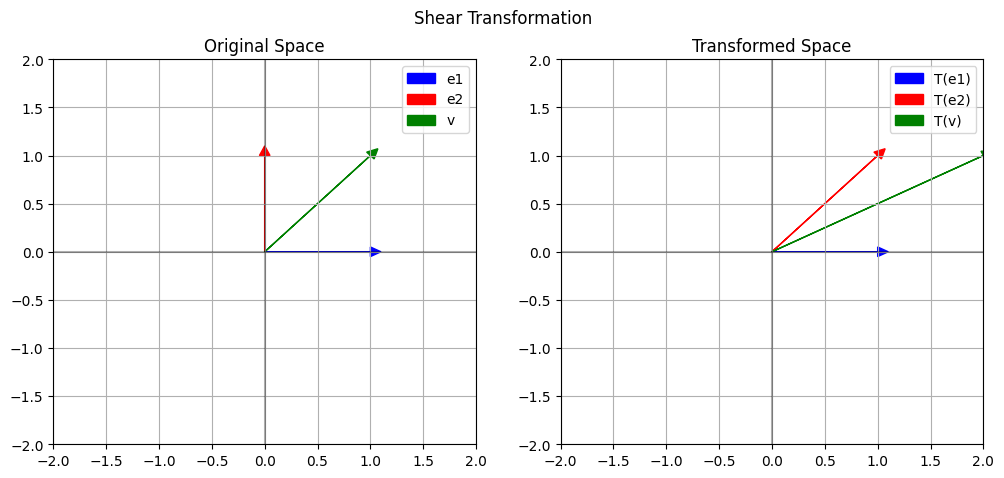

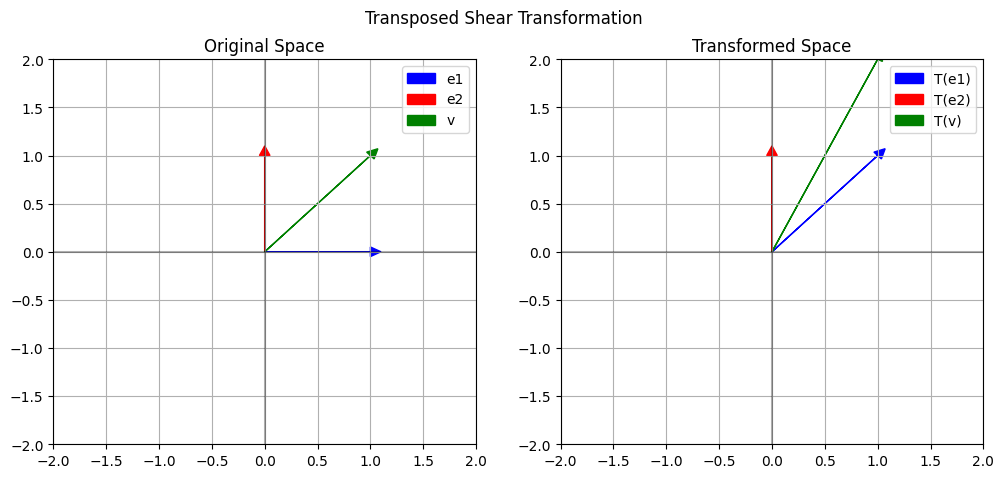

In [24]:
# Example 1: Shear transformation
shear_matrix = np.array([[1, 1],
                         [0, 1]])
shear_matrix_T = shear_matrix.T

v = np.array([1,1])

plot_transformation(shear_matrix, "Shear Transformation", v)
plot_transformation(shear_matrix_T, "Transposed Shear Transformation", v)

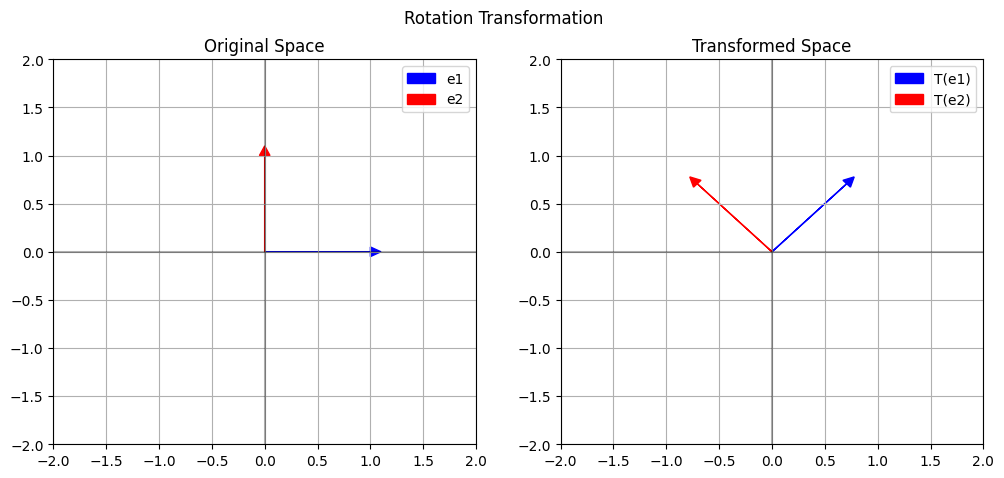

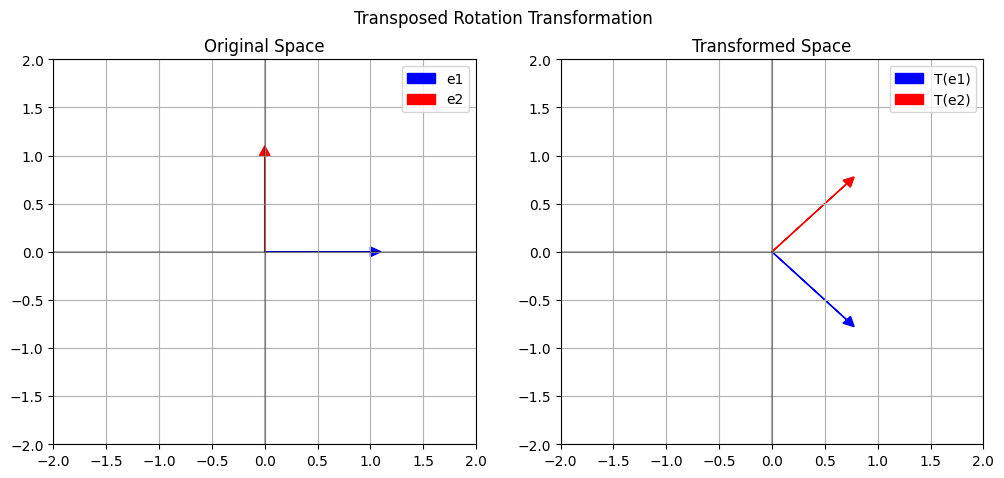

In [4]:
# Example 2: Rotation matrix
theta = np.pi/4  # 45 degrees
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                           [np.sin(theta), np.cos(theta)]])
rotation_matrix_T = rotation_matrix.T

plot_transformation(rotation_matrix, "Rotation Transformation")
plot_transformation(rotation_matrix_T, "Transposed Rotation Transformation")

## Key Properties of Matrix Transposition

1. **Geometric Meaning**: Transposition can be thought of as reflecting the transformation across the main diagonal.
2. **Preservation of Length**: For orthogonal matrices (like rotation matrices), the transpose is the same as the inverse.
3. **Dual Space**: The transpose represents the transformation in the dual space (space of linear functionals).

Let's verify some of these properties:

In [5]:
# Verify that for rotation matrix, transpose is the same as inverse
print("Rotation matrix:")
print(rotation_matrix)
print("\nRotation matrix transpose:")
print(rotation_matrix_T)
print("\nRotation matrix inverse:")
print(np.linalg.inv(rotation_matrix))

# Verify they're equal (up to numerical precision)
print("\nAre transpose and inverse equal?")
print(np.allclose(rotation_matrix_T, np.linalg.inv(rotation_matrix)))

Rotation matrix:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Rotation matrix transpose:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Rotation matrix inverse:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Are transpose and inverse equal?
True


## Practical Applications

1. **Solving Systems of Equations**: Transposition is used in least squares solutions
2. **Orthogonal Projections**: Transpose helps in computing projections
3. **Dual Spaces**: Important in understanding linear functionals and dual spaces

Let's see a practical example of using transposition in solving a system of equations:

In [6]:
# Example: Least squares solution using transposition
A = np.array([[1, 2],
              [3, 4],
              [5, 6]])
b = np.array([1, 2, 3])

# Least squares solution: x = (A^T A)^(-1) A^T b
x = np.linalg.inv(A.T @ A) @ A.T @ b

print("Least squares solution:")
print(x)

# Verify the solution
print("\nResidual norm:")
print(np.linalg.norm(A @ x - b))

Least squares solution:
[4.4408921e-16 5.0000000e-01]

Residual norm:
4.5814426260369203e-14
